# 1.7.1 Camera Calibration

In [43]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [44]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [45]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [46]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./C171/*.png') #('.\Image\*.png')

In [47]:
len(images)

26

In [48]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [49]:
cv2.imshow('img',img)

## Calibration

In [50]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [51]:
mtx

array([[966.17435971,   0.        , 617.87419441],
       [  0.        , 972.72472445, 381.54940761],
       [  0.        ,   0.        ,   1.        ]])

In [52]:
dist

array([[ 0.00437038, -0.30740781,  0.00117856,  0.00591308,  0.56052454]])

In [53]:
print(rvecs)

[array([[-0.20930914],
       [-0.27975253],
       [ 0.0033919 ]]), array([[-0.01885739],
       [ 0.41131454],
       [-3.08480779]]), array([[-0.30326023],
       [-0.34010602],
       [-3.05970825]]), array([[-0.21691751],
       [ 0.08518295],
       [ 0.02535186]]), array([[-0.36877459],
       [-0.4388446 ],
       [ 3.03339764]]), array([[ 0.00558367],
       [ 0.37652941],
       [-3.1000871 ]]), array([[ 0.22493461],
       [-0.55015566],
       [-3.03197702]]), array([[-0.03800146],
       [ 0.25039358],
       [ 3.13128536]]), array([[-0.52337452],
       [ 0.22034399],
       [-3.01275681]]), array([[-0.27980098],
       [ 0.01199051],
       [-0.02898602]]), array([[-0.22711598],
       [-0.23722205],
       [-0.01472638]]), array([[-0.27497338],
       [-0.5128502 ],
       [ 0.0105944 ]])]


In [54]:
tvecs

[array([[-5.0721315 ],
        [-0.85241232],
        [19.23055942]]),
 array([[ 1.93026216],
        [ 5.08676549],
        [18.02087296]]),
 array([[ 4.70527271],
        [ 6.17718158],
        [17.97796565]]),
 array([[-3.63663384],
        [-0.66944905],
        [23.35507495]]),
 array([[ 1.85393221],
        [ 4.54405493],
        [18.76887476]]),
 array([[ 2.17122439],
        [ 5.07272468],
        [17.64772233]]),
 array([[-0.88965357],
        [ 5.31568653],
        [18.43969929]]),
 array([[-2.20623443],
        [ 5.25633903],
        [18.09877669]]),
 array([[ 2.52820284],
        [ 5.13816781],
        [17.0049872 ]]),
 array([[-3.38265586],
        [-0.72061726],
        [22.52222262]]),
 array([[-5.4833518 ],
        [-0.45884743],
        [21.73735946]]),
 array([[-7.908778  ],
        [-0.13977938],
        [20.7488711 ]])]

## Undistortion

In [55]:
img = cv2.imread('chess.jpeg')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [56]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

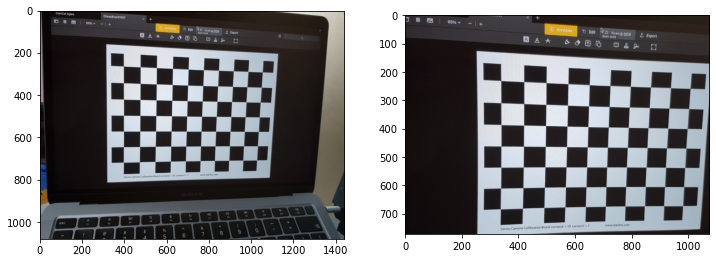

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [58]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

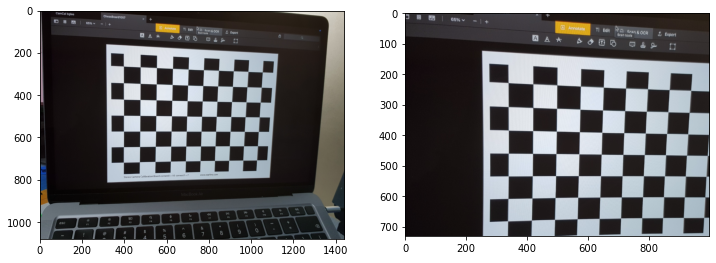

In [59]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [42]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

IndexError: list index out of range